# Lab 6 Practice: Examining Categorical Data

## Reminder - working with notebooks

#### 1) It is important to save your work, exit the notebook, and logout of syzygy whenever you are finished working on the notebook for that session. Simply closing the window in which you are working will leave the notebook running which can produce some minor problems when you next try to log in to resume working on the notebook.

- **Select File > Save Notebook or select the Save icon above to save your work.**
- **To exit the notebook, select File > Close and Shutdown Notebook.**
- **Select File > Log Out.**


#### 2) When you resume your work on a notebook, your previous work/output may still be displayed, but none of your previous work is maintained in memory accessible by the notebook. In particular, you will need to load the dataset again in order to continue working with the data. One easy way to refresh your notebook is to go to the notebook cell where you left off and do the following.

- **Select Kernel > Restart Kernel and Run up to Selected Cell.**
#### This will run all of the code in your notebook up to the selected cell.

## Objectives
The objectives of this tutorial/lab are the analysis of categorical (qualitative) variables.
* Contingency table
* Conditional proportions
* Graphical summary
* Simulating the study to test hypotheses

## Load Data: 

In [ ]:
download.file("http://www.openintro.org/stat/data/nc.RData",destfile = "nc.RData")
load("nc.RData")

The `download.file` function and `load` function are used to import the dataset that will be used in the assignment. The data that is available to you is called `nc`. These commands instruct R to access the OpenIntro website and retrieve some data, which is in a file called `nc.RData`. The .RData indicates a file format, like .csv, .txt etc. R is capable of importing files of various formats (using the appropriate command). The `nc` dataset, which is contained within `nc.RData` is already in a format native to R.  

## Data Information:

### Data Set:

#### Name: #### 
* `nc`


#### Variables: ####

The variables included in the dataset are  

* `fage`: Father's age in years.
* `mage`: Mother's age in years.
* `mature`: Maturity status of mother.
* `weeks`: Length of pregnancy in weeks.
* `premie`: Whether the birth was classified as premature (premie) or full-term.
* `visits`: Number of hospital visits during pregnancy.
* `gained`: Weight gained by mother during pregnancy in pounds.
* `weight`: Weight of the baby at birth in pounds.
* `lowbirthweight`: Whether baby was classified as low birthweight (low) or not (not low).
* `gender`: Gender of the baby, female or male.
* `habit`: Status of the mother as a nonsmoker or a smoker.
* `marital`: Whether mother is married or not married at birth.
* `whitemom`: Whether mom is white or not white.


## North Carolina Births

In 2004, the state of North Carolina released to the public a large data set containing information on births recorded in this state. This data set has been of interest to medical researchers who are studying the relation between habits and practices of expectant mothers and the birth of their children. This is a random sample of 1,000 cases from this data set.

---

We could use some combination of `head`, `tail`, `dim`, `names`, `str` to begin exploring the `nc` dataset.

In [ ]:
head(nc)

In [ ]:
str(nc)

We are interested in investigating factors that may be associated with the premature birth of a baby, `premie`. In particular we will consider race of the mother, `whitemom`, and maturity (age) of the mother, `mature`.

### Summarizing Categorical Data

#### Frequency Table and Relative Frequency Table

To begin, we can investigate what proportion of births in the dataset are premature births. We could consider the sample frequency or relative frequency distribution. The function `table` does this for you by counting the number of times each kind of response was given. To see the distribution of premature births, `premie`, type

In [ ]:
table(nc$premie)

The `prop.table` function takes a table of counts and converts those counts into proportions or relative frequencies. For example, to obtain the relative frequency table for `premie` we will first use the `table` function to create a table of counts, which we are saving as an object called `premie_count`. Then we will use the `prop.table` function to convert that table of counts into a table of proportions, or relative frequencies, which we are calling `premie_prop`.

In [ ]:
premie_count = table(nc$premie) 
# counts the number of subjects in each of the categories of the response variable
# saves the results in the object called premie_count
premie_count 
# displays the table of counts

In [ ]:
premie_prop = prop.table(premie_count)
# converts table of counts into a table of proportions, or relative frequencies
# saves results in object called premie.prop
premie_prop 
# displays the proportions

#### Graphical Summaries

Bar plots, or bar charts, are a common graphical summary for categorical variables.  
  
The function `barplot` creates plots based upon the counts in each category, or the proportion in each category, where the height of each bar represents the count, or proportion, in each category. The function requires information regarding count, or proportion, in each category, hence it requires information from the `table` or `prop.table` function.  
  
Use the `barplot` function to produce a bar plot of the sample proprtions in each category. The `barplot` function only requires the data to be graphed, but there are some optional arguments that may be used to customize the bar plot. Some of these optional arguments include:
Use the `barplot` function to produce a bar plot of the sample proprtions in each category. The `barplot` function only requires the data to be graphed, but there are some optional arguments that may be used to customize the bar plot. Some of these optional arguments include:
* `xlab` - specify the label for the x-axis, eg `xlab = "Premature Births"` 
* `ylab` - specify the label for the y-axis, eg `ylab = "Proportion"` 
* `ylim` - specify the minimum and maximum value for the y-axis, eg `ylim=c(minimum, maximum)` 
* `main` - specify a main title for the graph, eg `main = "Premature Births"`

In [ ]:
barplot(premie_prop, ylab="Proportion", main = "Premature Births" ) 
#produces barplot of proprtions in each category

#### Contingency Table

If two categorical variables are being compared, the numerical summary usually includes creating a contingency table which displays the number of observations that appear for each combination of categories from the two categorical variables. Categorical variables may be summarized by considering the counts, or proportion, in each of the categories.  
  
For example, the `table` command may be used to create a contingency table of counts to examine which births were premature, `premie`, across race of the mother, `whitemom`. Since there are two categorical variables appearing in the table, the order of the variables will determine the row variable and column variable for the table.

In [ ]:
table(nc$whitemom, nc$premie)

Since the interest is in comparing the distribution of premature births for white mothers and not white mothers we usually want to estimate the relevant proportions for each group. The `prop.table` function is an easy way to accomplish this. It takes a table of counts and converts those counts into proportions. The default for `prop.table` is to convert counts into proportions of the overall total. However, the `margin` argument allows you to specify row proportions (`margin = 1`) or column proportions (`margin = 2`). ***In our table the rows refer to race, which means that row proportions will be of primary interest***. Use the `prop.table` function below to compare the various options. Since the `prop.table` function uses a table of counts as its input, we could save the table of counts as an object to be used by the `prop.table`function.  

In [ ]:
whitemom_premie_count = table(nc$whitemom, nc$premie)
# creates a contingency table representing the number of premature births among white and not white mothers
# saves the results in the object called whitemom_premie_count
whitemom_premie_count 
# displays the table of counts

#### Row Proportions - Proportions of premature births for white and not white mothers

In [ ]:
whitemom_premie_row_prop = prop.table(whitemom_premie_count, margin = 1) 
# calculates the proportions for each row
whitemom_premie_row_prop

### Exercise: Construct a contingency table of counts to explore the relationship between maturity of the mother, `mature`, and premature births, `premie`. Set maturity, `mature` as the row variable.

<details>

<summary><b>Click to view sample code:</b></summary>


```
mature_premie_count = table(nc$mature, nc$premie)
mature_premie_count 
```

<br>
# creates a contingency table representing the number of premature births among mature and younger mothers<br>
# saves the results in the object called mature_premie_count<br>
# displays the table of counts

</details>

### Exercise: Construct a contingency table that displays the proportion of premature births and full term births for each maturity group.

<details>

<summary><b>Click to view sample code:</b></summary>


```
mature_premie_row_prop = prop.table(mature_premie_count, margin = 1) 
mature_premie_row_prop
```

<br>
# calculates the proportions for each row

</details>

### Graphical summaries

Barplots, or bar charts, and mosaic plots are common graphical summaries for categorical variables.  
  
The `barplot` function creates plots based upon specified counts or proportions. The height of each bar represents the relevant count, or proportion. The `barplot` function requires information regarding count, or proportion, hence it requires information from the `table` or `prop.table` function. Since there are two categorical variables information regarding each variable will be displayed by displaying stacked bars or grouped bars (side-by-side plot). It also may be necessary to include a legend in order to better convey the information contained in the graph. 
  
The `barplot` function only requires the data to be graphed, but as with the `plot` function, there are some optional arguments that may be used to customize the bar plot. Some of these optional arguments include:
* `beside` - setting `beside = TRUE` produces a grouped (side-by-side) barplot; setting `beside = FALSE` produces a stacked barplot 
* `legend` - setting `legend = TRUE` adds a legend to the barplot
* `xlab` - specify the label for the x-axis
* `ylab` - specify the label for the y-axis
* `ylim` - specify the minimum and maximum value for the y-axis, eg `ylim=c(minimum, maximum)`
* `main` - specify a main title for the graph

Since we want to compare the premature births for white and not white mothers, the `whitemom_premie_row_prop` table is of primary interest. This table shows the proprtions of premature births and full term birth among mothers classified as white and mothers classified as not white. There are several options for summarizing this table graphically using the `barplot` function.

#### Grouped barplots (side-by-side barplot)

R makes decisions about which categorical variable to display on the x-axis and which categorical variable to use to differentiate the bars based upon which categorical variable is the row variable and which is the column variable. The default for R is to display the column variable on the x-axis. We would prefer to have the explanatory variable, `whitemom`, on the x-axis. Since this is the row variable, we need to ask R to switch how the variables are being treated. The `t` function may be used to transpose the rows and columns as in the table shown below.

In [ ]:
barplot(t(whitemom_premie_row_prop), beside =TRUE, legend=TRUE, main = "Comparing premature births among white and not white mothers" )
#produces a grouped barplot of the row proprtions, but uses t() to transpose the role of the row variable and column variable when creating the graph

#### Stacked barplots

R makes decisions about which categorical variable to display on the x-axis and which categorical variable to use to differentiate the bars based upon which categorical variable is the row variable and which is the column variable. The default for R is to display the column variable on the x-axis. We would prefer to have the explanatory variable, `whitemom`, on the x-axis. Since this is the row variable, we need to ask R to switch how the variables are being treated. The `t` function may be used to transpose the rows and columns as in the table shown below.

In [ ]:
barplot(t(whitemom_premie_row_prop), legend=TRUE, main = "Comparing premature births among white and not white mothers" )
#produces a grouped barplot of the row proprtions, but uses t() to transpose the role of the row variable and column variable when creating the graph

***Consider how each of the barplots above represents the proportions that appear in the `whitemom_premie_row_prop` table.***

### Exercise: Construct a stacked barplot that displays the the proportion of premature births and full term births for each maturity group.

<details>

<summary><b>Click to view sample code:</b></summary>


```
barplot(t(mature_premie_row_prop), legend=TRUE, main = "Comparing premature births among mature and younger mothers")
```

<br>
#produces a grouped barplot of the row proprtions, but uses t() to transpose the role of the row variable and column variable when creating the graph

</details>

#### Mosaic plot

The function `mosaicplot` may be used to create a mosaic plot for a single categorical variable, or a pair of categorical variable. The function `mosaicplot` uses the table of counts to produce the mosaic plot. Therefore, to produce a mosaic plot that reflects the relationship between mother's race, `whitemom` and premature births, `premie`, we would enter the following command.

In [ ]:
mosaicplot(whitemom_premie_count, main = "Comparing premature births among white and not white mothers" )

### Exercise: Based upon the available information in the contingency table and graphs, does there seem to be an association between race of the mother and premature births? If so, how would you describe the association?

#### Answer: *The contingency tables and graphs suggest that there is an association between race of the mother and premature births. For mothers classified as not white, 19.7% of births were premature. For mothers classified as white,  13.5% of births were premature.*

### Exercise: Construct a mosaic plot that displays the relationship between maturity of the mother and premature births.

<details>

<summary><b>Click to view sample code:</b></summary>


```
mosaicplot(mature_premie_count, main = "Comparing premature births among mature and younger mothers" ) 
```


</details>

### Exercise: Based upon the available information in the contingency table and graphs, does there seem to be an association between maturity of the mother and premature births? If so, how would you describe the association?

### Answer: 

<details>

<summary><b>Sample Answer:</b></summary>

<br>*The contingency tables and graphs suggest that there is very little association between maturity of the mother and premature births. Mothers classified as mature have a slightly higher rate of premature births than younger mothers, but the rates are quite similar, with 17.4% of births to mature mothers being premature and 14.9% of births to younger mothers being premature*

</details>

### Simulating the study

Is there an association between the race of the mother and the chances of a premature birth? In particular, are mothers who are not classified as white as a greater risk of a premature birth?

There are two possible explanations for the difference in the rates of premature births observed in this study

i) Race of the mother and premature births are independent. They have no relationship. Difference in rates of premature births between not white mothers and white mothers is due to chance.

ii) Race of the mother and premature births are dependent/associated. Difference in rates of premature births between not white mothers and white mothers is not due to chance. Not white mothers have a higher rate of premature births.

We can simulate the study under the chance model, that is under the assumption that there is no association between the race of the mother and the chance of a premature birth. We can do this simulation within our notebook, using R. However, there is an informative R-based app that we encountered in class which we will use instead to do this simulation.

https://istats.shinyapps.io/Association_Categorical/


**Data Entry & Descriptive Statistics**
* Enter Data > Contingency Table
* Row Variable: Mother's Race
* Category Labels: Not White, White
* Column Variable: Premature Birth
* Category Labels: Premature, Full Term
* Enter Counts for Contingency Table: 
- Not White & Premature = 56
- Not White & Full Term = 228
- White & Premature = 96
- White & Full Term = 616

Note that the proportion of premature births among White mothers is 96/(96+616)=0.135 and the proportion of premature births among Not White mothers is 56/(56+228)=0.197. Hence, the observed difference in the proportion of premature births between Not White mothers and White mothers is 0.197 - 0.135 = 0.0624 or 6.24%

To see if a difference in proportions of this magnitude can be explained by chance, we will make use of the Permutation Distribution. This is the same approach as using differently coloured cards to represent premature births and dealing them at random into separate groups to represent the race of the mother. 

**Permutation Distribution (Chance Model)**
* Number of permutations of original data: 1,000
* Generate Permutations
* Show value of statistic from observed data
* Show value of statistic from last permutation
* Show statistical summary of permutation distribution

The results of 1000 simulations appear below. The permutation distribution is the chance distribution that we discussed in class. For each simulation we calculated the proportion of premature births among not white mothers, the proportion of premature births among white mothers, and the difference in those proportions. These are the results one would expect as a result of chance, i.e. the chance model.

The observed difference in proportions in our study was 0.0624 or 6.24%. This is indicated in the histogram as a yellow triangle.

In 1000 simulations (permutations) we see that 993 produce a difference in the proportion of premature births between the two groups that was less than the observed value of 0.0624 from our study. Only 7 simulations produce a difference as large as the difference observed in our study. 

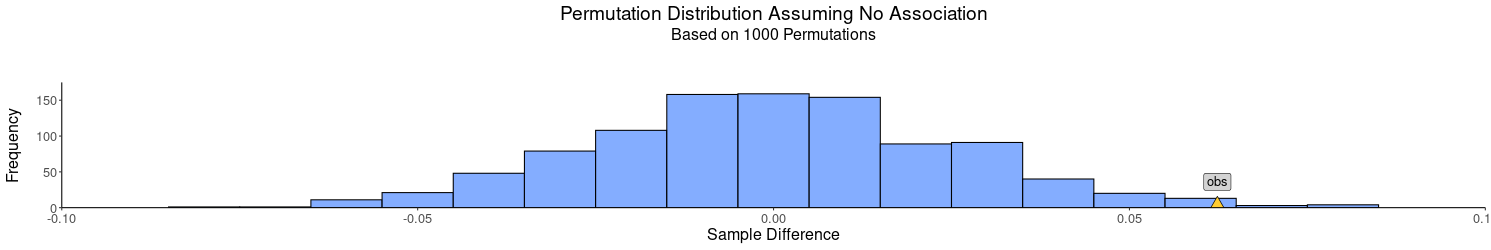

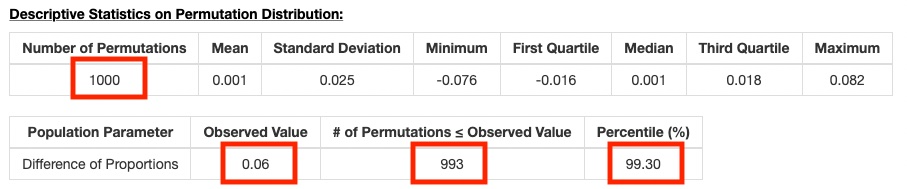

### Exercise: What do the simulation results shown suggest about the association between race of the mother and premature birth?

#### Answer:  *<br><br>Under the chance model, the model that assumes no relationship between race of the mother and premature births, only 7 out of 1000 times did we get a difference of 0.0624 or greater between the proportion of premature births among not white mothers and white mothers. Chance alone would produce such a difference less than 1% of the time.  This is so unlikely that we can conclude chance is not a plausible explanation for the difference in proportion of premature births observed in our study. <br><br>We can reject the claim of no relationship in favour of the alternative that there is an association between race of the mother and premature births. In particular, not white mothers have a higher rate of premature births than white mothers.*

### Exercise: Use the https://istats.shinyapps.io/Association_Categorical/ app to simulate the study exploring the relationship between maturity of the mother and premature births? 

### Exercise: In 1000 simulations, how many produced a difference in the proportion of premature births between mature mothers and younger mothers that was at least as big as the difference observed in our study?

### Answer: 

<details>

<summary><b>Sample Answer:</b></summary>

See sample solutions pdf for an example of results from simulating this study.<br><br>

The observed difference in the proportion of premature between mature mothers and younger mothers in our study was 0.174-0.149=0.025. We simulated the study 1000 times under the null hypothesis of no difference in the proportion of premature births in the two groups. This asserts that chance is the reason for any observed difference. Of the 1000 simulations 1000 - 802 = 198 simulations resulted in a difference in the proportion of premature births that was at least as big as 0.025.

</details>

### Exercise: What do the simulation results suggest about the association between the maturity of the mother and premature birth?

### Answer: 

<details>

<summary><b>Sample Answer:</b></summary>

<br>*Under the chance model, the model that assumes no relationship between maturity of the mother and premature births, 198 out of 1000 times we obtained a difference of 0.025 or greater between the proportion of premature births among mature mothers and younger mothers. Hence, our study results are quite consistent with the results one would expect due to chane alone. Thus we cannot reject the chance as a plausible explanation for the difference in proportion of premature births observed in our study. <br><br>We do not have sufficient evidence to conclude that there is an association between maturity the mother and premature births. In particular, we lack sufficient evidence to conclude that more mature mothers have a higher rate of premature births than younger mothers.*

</details>

#### Let’s stop here. 

#### It is important to save your work, exit the notebook, and logout of syzygy when you are done. Simply closing the window in which you are working will leave the notebook running which can produce some minor problems when you next try to log in.

- **Select File > Save Notebook or select the Save icon above to save your work.**
- **To exit the notebook, select File > Close and Shutdown Notebook.**
- **Select File > Log Out.**